In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START,END

In [2]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation: str
    final_result: float

In [3]:
def add_operation(state:AgentState) -> AgentState:
    """This node adds two numbers."""
    state["final_result"] = state["num1"] + state["num2"]
    return state

def subtract_operation(state:AgentState) -> AgentState:
    """This node subtracts two numbers."""
    state["final_result"] = state["num1"] - state["num2"]
    return state



In [ ]:
def decide_next_node(state:AgentState) -> AgentState:
    "This node will select the next node based on the operation."
    if state["operation"] == "add" or state["operation"] == "+":
        return "addition"
    elif state["operation"] == "subtract" or state["operation"] == "-":
        return "subtraction"
    

# or you can create a state next_node : str
# and set it to "addition" or "subtraction" and use that as the condition
#def decide_next_node(state:AgentState) -> AgentState:
#    "This node will select the next node based on the operation."
#    if state["operation"] == "add" or state["operation"] == "+":
#        state["next_node"] = "addition"
#    elif state["operation"] == "subtract" or state["operation"] == "-":
#        state["next_node"] = "subtraction"
#    return state
# how to use it in the graph edges:
# graph.add_conditional_edges(
#    "router")

In [5]:
graph = StateGraph(AgentState)
graph.add_node("add_node",add_operation)
graph.add_node("subtract_node",subtract_operation)
graph.add_node("router", lambda state: state) #pass-through funtion (input state is output state)

In [6]:
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition": "add_node",
        "subtraction": "subtract_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

In [7]:
app = graph.compile()

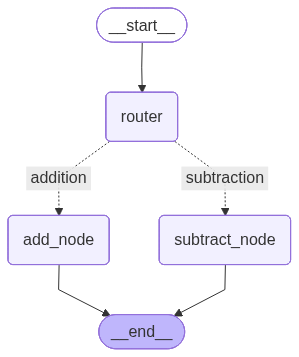

In [8]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke(
    {
        "num1": 10,
        "num2": 5,
        "operation": "add"
    }
)

In [10]:
result

{'num1': 10, 'num2': 5, 'operation': 'add', 'final_result': 15}